# Finding melt ponds

In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import h5py  
import os, sys
sys.path.append('../')
import readers as rd
import utils as ut


### Read the IS2 data

In [4]:
IS2_path='/Users/ellen.buckley/Documents/DATA/IS2/ATL03/ATL03_20190618062235_12370304_R001_01.h5'
f = h5py.File(IS2_path, 'r')

In [5]:
heights=f['gt1l/heights/h_ph'][:]
lats=f['gt1l/heights/lat_ph'][:]
lons=f['gt1l/heights/lon_ph'][:]
conf=f['gt1l/heights/signal_conf_ph'][:]
conf_si= [x[2] for x in conf]
dt= f['gt1l/heights/delta_time'][:]
#geoid=f['gt1l/geophys_corr/geoid'][:]
d = {'heights': heights, 'lats': lats, 'lons':lons, 'conf':conf_si,'dt':dt}#,'geoid':geoid}
df = pd.DataFrame(data=d)

In [6]:
df.head()

,conf,dt,heights,lats,lons
0,-1,4.607416e+07,2340.452148,79.994063,-50.389341
1,-1,4.607416e+07,2340.981689,79.994063,-50.389341
2,-1,4.607416e+07,2331.898438,79.994063,-50.389344
3,-1,4.607416e+07,2371.095947,79.994069,-50.389337
4,-1,4.607416e+07,2331.466797,79.994075,-50.389360


### Cut area

In [7]:
# for the 06/09 flight- looking at MPs near Nares Strait and St. Georges Fjord
df1L= df[(df['lats']>82) &(df['lats']<86)&(df['lons']>-95)&(df['lons']<-15)&(df['conf']>1)]
#df2L= dF032L[(dF032L['lats']>80) &(dF032L['lats']<85)&(dF032L['lons']>-95)&(dF032L['lons']<-15)]

## Plot location 

### Location of the MP segment

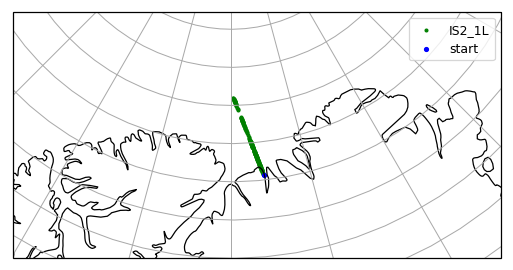

In [10]:
#plt.figure(figsize=(12, 5))

plt.figure(figsize=(7,7), dpi= 90)
# Make a new "NorthPolarStereo" projection instance
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-60))
# found the location of the closest underflight line in the ATM data 13500000:27000000 seconds 49101.974680781364 -50828.121111258864
#plt.scatter(ATM_df_cut['lons'][::1000],ATM_df_cut['lats'][::1000],c='b', s=1, label= 'ATM',transform=ccrs.PlateCarree())
plt.scatter(df1L['lons'][::10000],df1L['lats'][::10000],c='g', s=5, label='IS2_1L',transform=ccrs.PlateCarree())
plt.scatter(df1L['lons'].values[0],df1L['lats'].values[0],c='b', s=10, label='start',transform=ccrs.PlateCarree())
#plt.scatter(df2L['lons'][::100],df2L['lats'][::100],c='r', s=1, label='IS2_2L',transform=ccrs.PlateCarree())
#plt.colorbar(label='seconds', shrink=0.5, extend='both')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
#plt.xlim(-125.5,-125)
#plt.ylim(86.4,86.5)
#ax.set_extent([-137, -128, 85, 87.5], ccrs.PlateCarree())
ax.set_extent([-95, -15, 85, 80], ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.gridlines(color='darkgrey')
plt.legend()
plt.show()


In [13]:
#df[(df.dt==df1L['dt'].values[320000])]

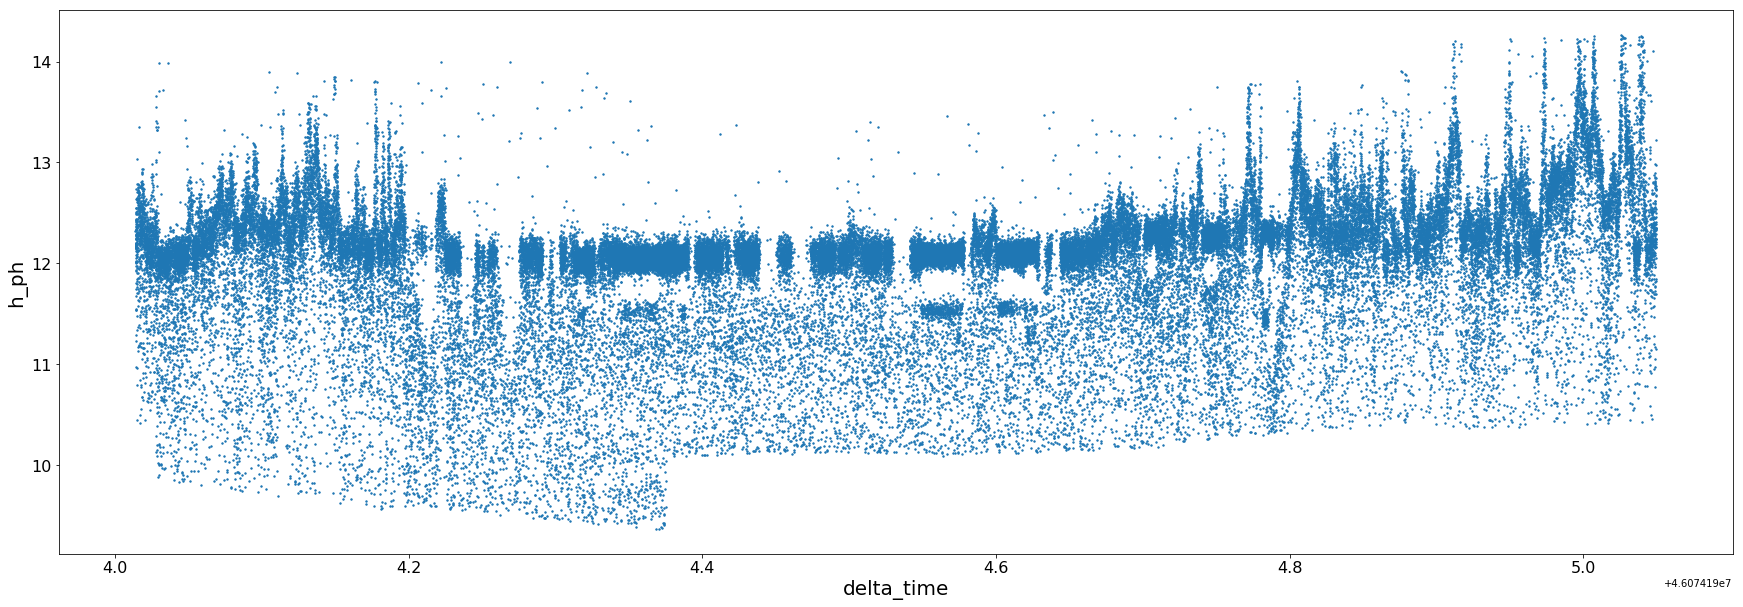

In [11]:
fig, ax = plt.subplots(figsize=(30,10));
plt.scatter(df1L['dt'][230000:320000],df1L['heights'][230000:320000],s=2);
plt.xlabel('delta_time', fontsize=20);
plt.ylabel('h_ph', fontsize=20);
plt.xticks(fontsize=16),plt.yticks(fontsize=16);

In [14]:
#df1L['dt'].values[230000]#-df1L['dt'].values[230000]

In [45]:
# Save segment for GMT plot or QGIS
np.savetxt('/Volumes/EllenBackup/ANALYSIS/IS2/MP_retrack/test1/test1_xy.txt', df1L.filter(items=['lons','lats'])[230000:320000].values, fmt='%.8f',delimiter= '\t')

# Test 2

In [46]:
IS2_path='/Users/ellen.buckley/Documents/DATA/IS2/OIB_uf/ATL03_20190412130133_02180304_001_01.h5'
f = h5py.File(IS2_path, 'r')

In [47]:
heights=f['gt1l/heights/h_ph'][:]
lats=f['gt1l/heights/lat_ph'][:]
lons=f['gt1l/heights/lon_ph'][:]
conf=f['gt1l/heights/signal_conf_ph'][:]
conf_si= [x[2] for x in conf]
dt= f['gt1l/heights/delta_time'][:]
#geoid=f['gt1l/geophys_corr/geoid'][:]
d = {'heights': heights, 'lats': lats, 'lons':lons, 'conf':conf_si,'dt':dt}#,'geoid':geoid}
df = pd.DataFrame(data=d)